In [1]:
import os, numpy as np, matplotlib.pyplot as plt, tensorflow as tf
from tensorflow.keras import layers, models

# ---- 1. CONFIG: CHANGE ONLY THIS PATH ----
DATA_DIR = "Landscape Classification"   # <-- PUT YOUR FOLDER PATH HERE
IMG_SIZE = (128, 128)                 # target image size (can change)
BATCH_SIZE = 32
EPOCHS = 5                            # increase if you want better training



In [2]:
# ---- 2. LOAD DATA FROM FOLDERS (auto train/val split) ----
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,     # 80% train, 20% val
    subset="training",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

class_names = train_ds.class_names
num_classes = len(class_names)
print("Classes:", class_names)

Found 10000 files belonging to 5 classes.
Using 8000 files for training.
Found 10000 files belonging to 5 classes.
Using 2000 files for validation.
Classes: ['Coast', 'Desert', 'Forest', 'Glacier', 'Mountain']


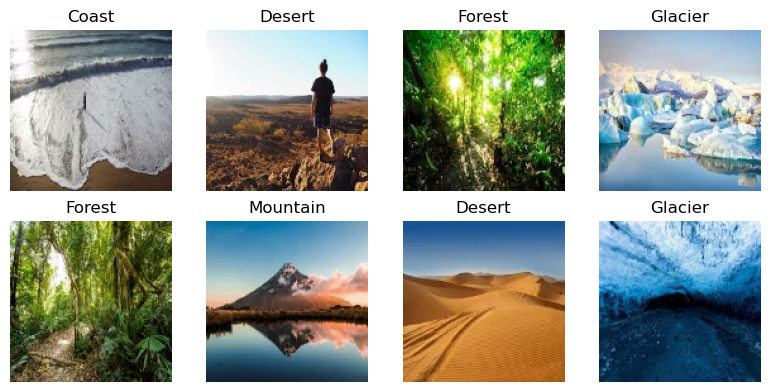

In [3]:
# ---- 3. VISUALIZE SOME IMAGES ----
plt.figure(figsize=(8, 4))
for images, labels in train_ds.take(1):
    for i in range(8):
        if i >= images.shape[0]: break
        plt.subplot(2, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.tight_layout(); plt.show()

In [4]:
# ---- 4. BUILD A GENERIC CNN MODEL ----
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=IMG_SIZE + (3,)),  # safety normalization
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(128,(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # labels are integer encoded
    metrics=['accuracy']
)

model.summary()


C:\Users\RAGHAV ANIL BHISE\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\preprocessing\data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,288,325 (16.36 MB)

 Trainable params: 4,288,325 (16.36 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# ---- 5. TRAIN THE MODEL ----
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 72s 280ms/step - accuracy: 0.5779 - loss: 1.1038 - val_accuracy: 0.6780 - val_loss: 0.8665
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 53s 213ms/step - accuracy: 0.6529 - loss: 0.9369 - val_accuracy: 0.7050 - val_loss: 0.7904
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 55s 221ms/step - accuracy: 0.6674 - loss: 0.8808 - val_accuracy: 0.7205 - val_loss: 0.7577
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 58s 231ms/step - accuracy: 0.6860 - loss: 0.8327 - val_accuracy: 0.7230 - val_loss: 0.7027
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 58s 231ms/step - accuracy: 0.7115 - loss: 0.7716 - val_accuracy: 0.7475 - val_loss: 0.6688



==================== RESULTS ====================
Final Training Accuracy     : 71.15%
Final Validation Accuracy   : 74.75%



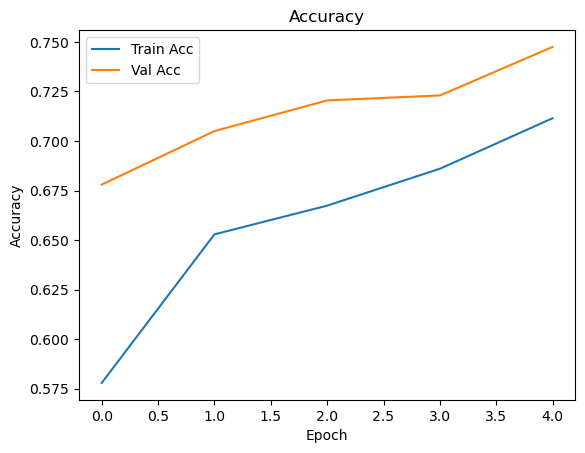

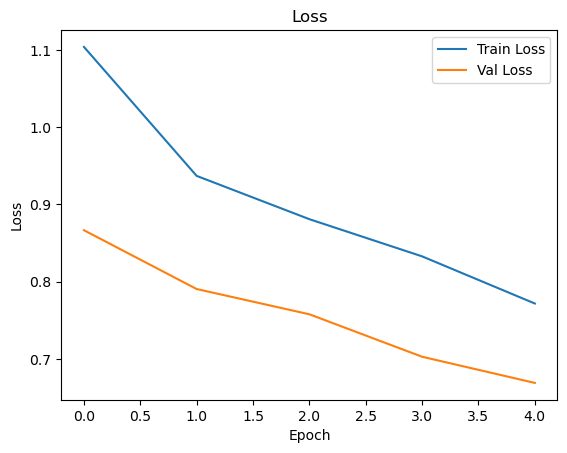

In [8]:
# ---- 6. PLOT TRAINING HISTORY ----

# ===== SHOW FINAL TRAIN & VALIDATION ACCURACY =====

train_acc = history.history['accuracy'][-1]
val_acc   = history.history['val_accuracy'][-1]

print("\n==================== RESULTS ====================")
print(f"Final Training Accuracy     : {train_acc * 100:.2f}%")
print(f"Final Validation Accuracy   : {val_acc * 100:.2f}%")
print("=================================================\n")

plt.figure()
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend(); plt.title('Accuracy'); plt.show()

plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend(); plt.title('Loss'); plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


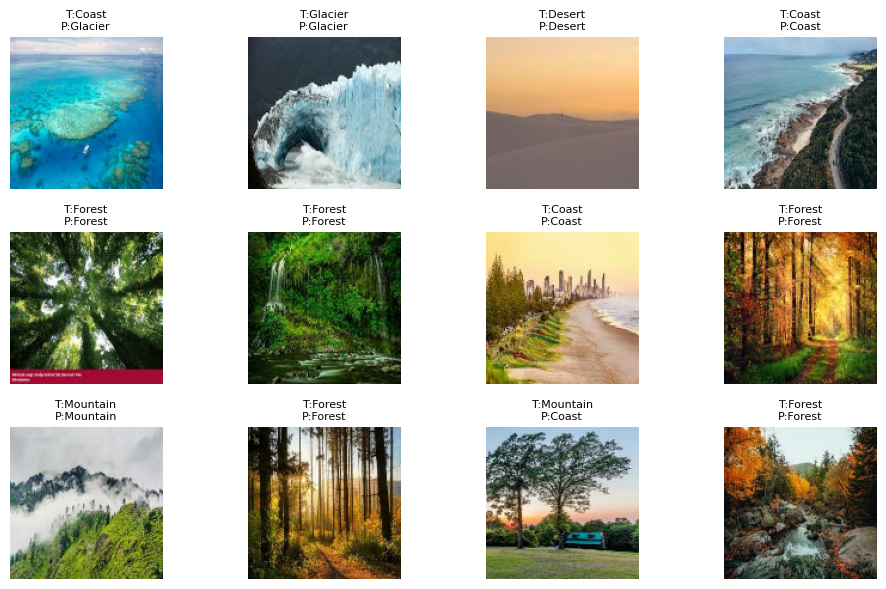

In [7]:
# ---- 7. EVALUATE & PREDICT ON SOME VALIDATION IMAGES ----
val_images, val_labels = next(iter(val_ds))
pred_probs = model.predict(val_images)
pred_classes = np.argmax(pred_probs, axis=1)

plt.figure(figsize=(10, 6))
for i in range(12):
    if i >= val_images.shape[0]: break
    plt.subplot(3, 4, i + 1)
    plt.imshow(val_images[i].numpy().astype("uint8"))
    true_label = class_names[val_labels[i]]
    pred_label = class_names[pred_classes[i]]
    plt.title(f"T:{true_label}\nP:{pred_label}", fontsize=8)
    plt.axis("off")
plt.tight_layout(); plt.show()

In [2]:
# ===== ONE-CELL GENERIC CNN IMAGE CLASSIFICATION (ANY LOCAL DATASET) =====
# Folder format required:
# DATA_DIR/
#   class1/ img1.jpg, img2.jpg, ...
#   class2/ imgA.jpg, imgB.jpg, ...
# Change only DATA_DIR below.

import os, numpy as np, matplotlib.pyplot as plt, tensorflow as tf
from tensorflow.keras import layers, models

# -------- CONFIG --------
DATA_DIR  = "Landscape Classification"   # <-- CHANGE THIS TO YOUR DATA FOLDER
IMG_SIZE  = (128, 128)
BATCH_SIZE = 32
EPOCHS     = 5

# -------- LOAD DATA (AUTO TRAIN/VAL SPLIT) --------
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

class_names = train_ds.class_names
num_classes = len(class_names)
print("Detected classes:", class_names)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(AUTOTUNE)
val_ds   = val_ds.cache().prefetch(AUTOTUNE)

# -------- BUILD MODEL --------
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=IMG_SIZE + (3,)),
    layers.Conv2D(32, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

# -------- TRAIN --------
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    verbose=1
)

# -------- PRINT ACCURACY CLEARLY --------
train_acc = history.history['accuracy'][-1]
val_acc   = history.history['val_accuracy'][-1]
print("\n==================== FINAL RESULTS ====================")
print(f"Final Training Accuracy   : {train_acc * 100:.2f}%")
print(f"Final Validation Accuracy : {val_acc * 100:.2f}%")
print("=======================================================\n")

Found 10000 files belonging to 5 classes.
Using 8000 files for training.
Found 10000 files belonging to 5 classes.
Using 2000 files for validation.
Detected classes: ['Coast', 'Desert', 'Forest', 'Glacier', 'Mountain']


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,288,325 (16.36 MB)

 Trainable params: 4,288,325 (16.36 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 101s 381ms/step - accuracy: 0.6162 - loss: 1.0171 - val_accuracy: 0.6710 - val_loss: 0.8688
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 90s 360ms/step - accuracy: 0.6809 - loss: 0.8684 - val_accuracy: 0.7205 - val_loss: 0.7420
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 95s 380ms/step - accuracy: 0.7114 - loss: 0.7905 - val_accuracy: 0.7310 - val_loss: 0.7175
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 88s 352ms/step - accuracy: 0.7330 - loss: 0.7359 - val_accuracy: 0.7370 - val_loss: 0.7025
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 91s 363ms/step - accuracy: 0.7575 - loss: 0.6694 - val_accuracy: 0.7535 - val_loss: 0.6453

==================== FINAL RESULTS ====================
Final Training Accuracy   : 75.75%
Final Validation Accuracy : 75.35%

